Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(1)
FI = poly.fit_transform(X)

print(FI)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

w = linalg.inv(FI.T@FI)@FI.T@y

print(w)

w = linalg.pinv(FI)@y

print(w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

x = [1. 0.] y = 4 h(x) = 2.1999999999999993
x = [1. 1.] y = 1 h(x) = 2.6571428571428566
x = [1. 2.] y = 2 h(x) = 3.114285714285714
x = [1. 4.] y = 5 h(x) = 4.0285714285714285

E(h|D) = 4.085714285714286
MSE = 2.042857142857143


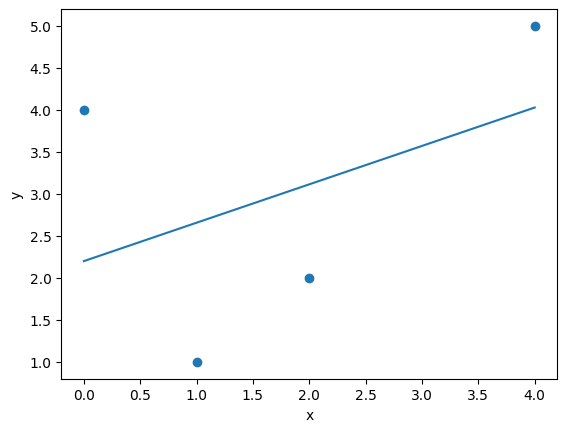

In [6]:
from sklearn.metrics import mean_squared_error

def h(w, x_tilde):
    return np.dot(w, x_tilde)

y_pred = []
EhD = 0

for i in range(len(FI)):

    hx = h(w, FI[i])
    print("x =", FI[i], "y =", y[i], "h(x) =", hx)
    
    y_pred += [hx]
    EhD += (y[i] - hx)**2

# 2. nacin y_pred = FI@w

EhD *= 1/2 
mse = mean_squared_error(y, y_pred)

print()
print("E(h|D) =", EhD)
print("MSE =", mse)

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
# w = linalg.inv(FI) @ y
# linalg.det(FI) 
# Oboje daju error.

print(linalg.matrix_rank(FI))
print(FI.shape)


2
(4, 2)


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [8]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(X, y)

w = [reg.intercept_, reg.coef_[0]]
print("w =", w)


print("MSE =", mean_squared_error(y, reg.predict(X)))


w = [2.2, 0.45714285714285713]
MSE = 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    y = []
    for x in X:
        y += [f(x) + normal(0, noise)]
    return y

In [10]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [11]:
def f(x):
    return 5 + x - 2*x**2 - 5*x**3

s = 200
X = make_instances(-5, 5, 50)
y = make_labels(X, f, s)


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

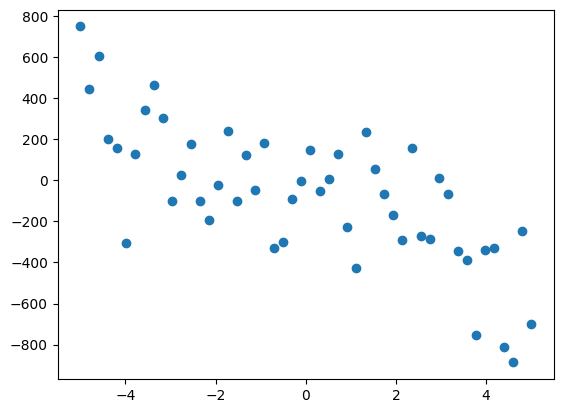

In [12]:
plt.scatter(X, y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

MSE = 42484.81390518563


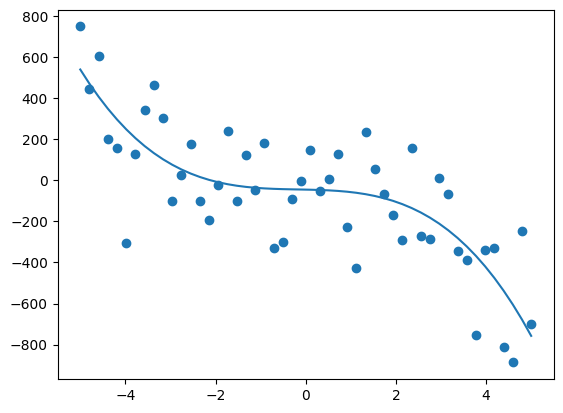

In [13]:
FI = PolynomialFeatures(3).fit_transform(X)

reg = LinearRegression().fit(FI, y)
y_pred = reg.predict(FI)

print("MSE =", mean_squared_error(y, y_pred))

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

d =  1 MSE = 52917.293886841966
d =  3 MSE = 42484.81390518563
d =  5 MSE = 41925.447076433455
d =  10 MSE = 37741.42059508861
d =  20 MSE = 21784.26879170827


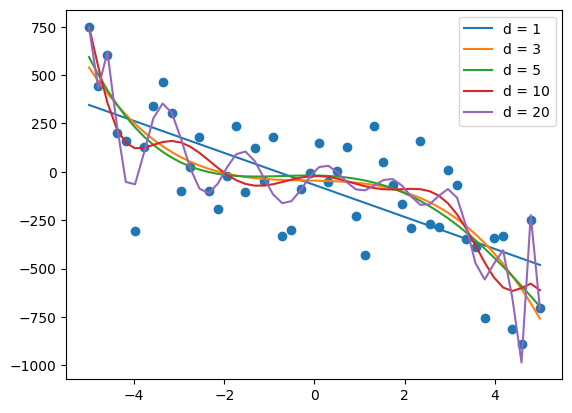

In [14]:
plt.scatter(X, y)

ds = [1, 3, 5, 10, 20]

for d in ds:
    FI = PolynomialFeatures(d).fit_transform(X)

    reg = LinearRegression().fit(FI, y)
    y_pred = reg.predict(FI)

    plt.plot(X, y_pred, label="d = " + str(d))

    print("d = ", d, "MSE =", mean_squared_error(y, y_pred))

plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

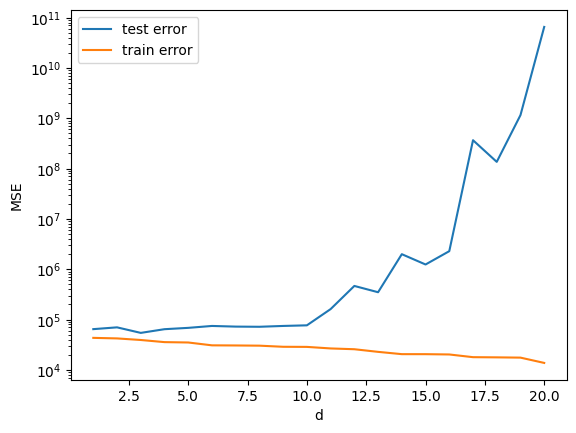

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

mses = []
mses_test = []
mses_train = []

for d in range(1, 21):
    poly = PolynomialFeatures(d)
    FI = poly.fit_transform(X_train)
    reg = LinearRegression().fit(FI, y_train)
    mses_test += [mean_squared_error(y_test, reg.predict(poly.fit_transform(X_test)))]
    mses_train += [mean_squared_error(y_train, reg.predict(poly.fit_transform(X_train)))]


plt.yscale("log")
plt.xlabel("d")
plt.ylabel("MSE")
plt.plot(range(1, 21), mses_test, label="test error")
plt.plot(range(1, 21), mses_train, label="train error")
plt.legend()
plt.show()



### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

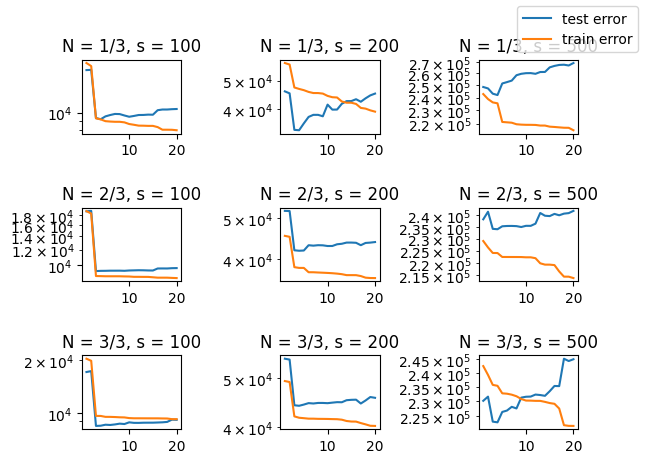

In [16]:
def tocnost(X_train, X_test, y_train, y_test):
    mses = []
    mses_train = []
    for d in range(1, 21):
        poly = PolynomialFeatures(d)
        FI = poly.fit_transform(X_train)
        reg = LinearRegression().fit(FI, y_train)
        mse = mean_squared_error(y_test, reg.predict(poly.fit_transform(X_test)))
        mse_train = mean_squared_error(y_train, reg.predict(poly.fit_transform(X_train)))
        mses += [mse]
        mses_train += [mse_train]
    return range(1, 21), mses, mses_train


X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size=0.5)

X_train = np.array(X_train)
X_test = np.array(X_test)

y_train, y_test = [], [] 

y_train += [np.array(make_labels(X_train, f, 100))]
y_train += [np.array(make_labels(X_train, f, 200))]
y_train += [np.array(make_labels(X_train, f, 500))]

y_test += [np.array(make_labels(X_test, f, 100))]
y_test += [np.array(make_labels(X_test, f, 200))]
y_test += [np.array(make_labels(X_test, f, 500))]

f, axarr = plt.subplots(3, 3)

i = np.random.choice(np.arange(500), 500//3, replace=False)
x, y, y_t = tocnost(X_train[i], X_test[i], y_train[0][i], y_test[0][i])
axarr[0, 0].set_yscale('log')
axarr[0, 0].set_title('N = 1/3, s = 100')
axarr[0, 0].plot(x, y, label="test error")
axarr[0, 0].plot(x, y_t, label="train error")

x, y, y_t = tocnost(X_train[i], X_test[i], y_train[1][i], y_test[1][i])
axarr[0, 1].set_yscale('log')
axarr[0, 1].set_title('N = 1/3, s = 200')
axarr[0, 1].plot(x, y)
axarr[0, 1].plot(x, y_t)

x, y, y_t = tocnost(X_train[i], X_test[i], y_train[2][i], y_test[2][i])
axarr[0, 2].set_yscale('log')
axarr[0, 2].set_title('N = 1/3, s = 500')
axarr[0, 2].plot(x, y)
axarr[0, 2].plot(x, y_t)

i = np.random.choice(np.arange(500), 2*500//3, replace=False)
x, y, y_t = tocnost(X_train[i], X_test[i], y_train[0][i], y_test[0][i])
axarr[1, 0].set_yscale('log')
axarr[1, 0].set_title('N = 2/3, s = 100')
axarr[1, 0].plot(x, y)
axarr[1, 0].plot(x, y_t)

x, y, y_t = tocnost(X_train[i], X_test[i], y_train[1][i], y_test[1][i])
axarr[1, 1].set_yscale('log')
axarr[1, 1].set_title('N = 2/3, s = 200')
axarr[1, 1].plot(x, y)
axarr[1, 1].plot(x, y_t)

x, y, y_t = tocnost(X_train[i], X_test[i], y_train[2][i], y_test[2][i])
axarr[1, 2].set_yscale('log')
axarr[1, 2].set_title('N = 2/3, s = 500')
axarr[1, 2].plot(x, y)
axarr[1, 2].plot(x, y_t)

i = np.random.choice(np.arange(500), 2*500//3, replace=False)
x, y, y_t = tocnost(X_train[i], X_test[i], y_train[0][i], y_test[0][i])
axarr[2, 0].set_yscale('log')
axarr[2, 0].set_title('N = 3/3, s = 100')
axarr[2, 0].plot(x, y)
axarr[2, 0].plot(x, y_t)

x, y, y_t = tocnost(X_train[i], X_test[i], y_train[1][i], y_test[1][i])
axarr[2, 1].set_yscale('log')
axarr[2, 1].set_title('N = 3/3, s = 200')
axarr[2, 1].plot(x, y)
axarr[2, 1].plot(x, y_t)

x, y, y_t = tocnost(X_train[i], X_test[i], y_train[2][i], y_test[2][i])
axarr[2, 2].set_yscale('log')
axarr[2, 2].set_title('N = 3/3, s = 500')
axarr[2, 2].plot(x, y)
axarr[2, 2].plot(x, y_t)


f.legend()
f.subplots_adjust(wspace=1)
f.subplots_adjust(hspace=1)
plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [17]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(3)
FI = poly.fit_transform(X)

ls = [0, 1, 10]


for l in ls:
    li = l*np.identity(FI.shape[1])
    li[0][0] = 0
    
    w = linalg.inv(FI.T@FI + li)@FI.T@y

    print("λ =", l, "w =", w.tolist())



λ = 0 w = [4.000000000000163, -5.916666666665442, 3.374999999998924, -0.45833333333315174]
λ = 1 w = [3.0569614512472345, -0.6907936507936602, -0.28317460317459153, 0.1445804988662102]
λ = 10 w = [2.49444184312298, -0.15897294873415221, -0.13423066536848105, 0.08156009919705827]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [18]:
from sklearn.linear_model import Ridge

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])


FI = PolynomialFeatures(3).fit_transform(X)

ls = [0, 1, 10]


for l in ls:
    clf = Ridge(alpha=l, solver="cholesky")
    clf.fit(FI, y)
    w = [clf.intercept_] + clf.coef_
    print("λ =", l, "w =", w.tolist())


λ = 0 w = [4.000000000000021, -1.9166666666667087, 7.375000000000049, 3.5416666666666847]
λ = 1 w = [3.0569614512471652, 2.366167800453514, 2.773786848072563, 3.201541950113378]
λ = 10 w = [2.4944418431229725, 2.3354688943888253, 2.3602111777544894, 2.576001942320031]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

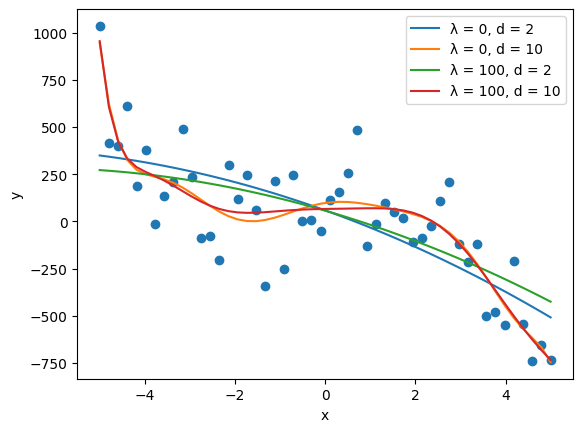

In [19]:
def f(x):
    return 5 + x - 2*x**2 - 5*x**3

s = 200
X = make_instances(-5, 5, 50)
y = make_labels(X, f, s)

for l in {0, 100}:
    for d in {2, 10}:
        

        poly = PolynomialFeatures(d)

        FI = poly.fit_transform(X)
    
        clf = Ridge(alpha=l)
        clf.fit(FI, y)

        plt.plot(X, clf.predict(FI), label="λ = " +str(l)+", d = " + str(d))

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X, y)
plt.legend()
plt.show()



### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


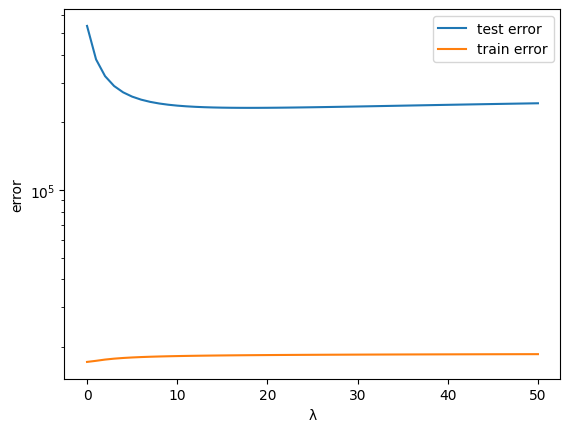

In [20]:
s = 200
X = make_instances(-5, 5, 50)
y = make_labels(X, f, s)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

d = 10

mses = []
mses_train = []

poly = PolynomialFeatures(d)
FI_train = poly.fit_transform(X_train)#.reshape(-1, 1))
FI_test = poly.fit_transform(X_test)#.reshape(-1, 1))

for l in range(0, 51):

    li = l*np.identity(FI_train.shape[1])
    li[0][0] = 0
    
    w = linalg.inv(FI_train.T@FI_train + li)@FI_train.T@y_train

    #clf = Ridge(alpha=l)
    #clf.fit(FI_train, y_train)
    #mse = mean_squared_error(y_test, clf.predict(FI_test))
    #mse_train = mean_squared_error(y_train, clf.predict(FI_train))

    mse = mean_squared_error(y_test, FI_test@w)
    mse_train = mean_squared_error(y_train, FI_train@w)

    mses += [mse]
    mses_train += [mse_train]


plt.yscale("log")
plt.xlabel('λ')
plt.ylabel('error')
plt.plot(range(0, 51), mses, label="test error")
plt.plot(range(0, 51), mses_train, label="train error")
plt.legend()
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [40]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

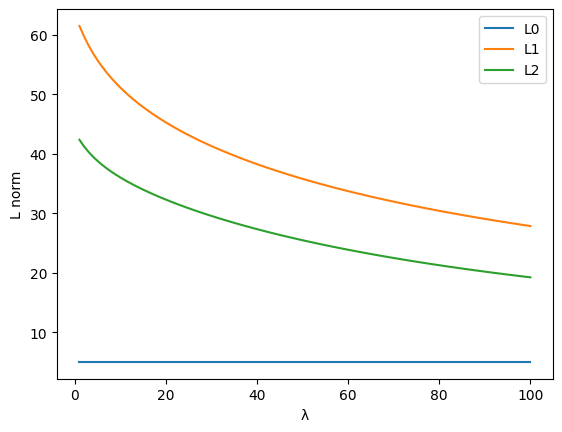

In [44]:
from sklearn.linear_model import Ridge
def L2(w):
    return ((w@w.T)**(1/2)).tolist()[0]
def L1(w):
    return sum(abs(w))
def L0(w):
    return nonzeroes(w.T)



d = 5
l0s = []
l1s = []
l2s = []


poly = PolynomialFeatures(d)
FI = poly.fit_transform(X_train)

for l in range(1, 101):
    clf = Ridge(l)
    clf.fit(FI, y_train)

    w = clf.coef_

        
    #li = l*np.identity(FI.shape[1])
    #li[0][0] = 0
    #w = linalg.inv(FI.T@FI + li)@FI.T@y_train

    l0s += [L0(w)]
    l1s += [L1(w)]
    l2s += [L2(w)]

#plt.yscale("log")
plt.xlabel('λ')
plt.ylabel('L norm')
plt.plot(range(1, 101), l0s, label="L0")
plt.plot(range(1, 101), l1s, label="L1")
plt.plot(range(1, 101), l2s, label="L2")

plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

61.64761141923471
59.701341040229984
57.75421692454449
55.906064967279185
53.998952373587
52.091673746886194
50.184088303777685
48.27613945638315
46.36858396740233
44.46055341747608
42.552948901961614
41.19922052765893
40.917680208048274
40.63583991469477
40.354156483902166
40.07222800496121
39.790239512595726
39.508167633207016
39.2262718883413
38.944035903190695
38.66224811193403
38.38017671032947
38.09807586617761
37.815883898011315
37.53388272292956
37.25205689785879
36.97003791435195
36.687789848645345
36.40565369485479
36.12360579476922
35.84165332661589
35.559402196770755
35.277601809015735
34.99547934742704
34.713413481997904
34.43140148303011
34.14903973278556
33.86711382170277
33.58523544743356
33.30298419754175
33.020766471795774
32.738995552993316
32.45683494755899
32.17469992566238
31.89258198760069
31.610494676270847
31.3284294956366
31.046376604691893
30.76435302605478
30.482348765539488
30.20035229920975
29.918386501417846
29.635955220722913
29.354017785351413
29.072084

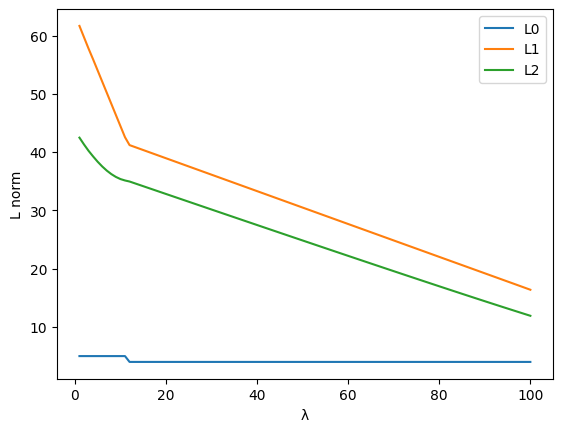

In [46]:
from sklearn.linear_model import Lasso



l0s = []
l1s = []
l2s = []


for l in range(1, 101):
    clf = Lasso(l, max_iter=5000)
    clf.fit(FI, y_train)
    
    w = np.array([clf.coef_])

    
    #li = l*np.identity(FI.shape[1])
    #li[0][0] = 0
    #w = linalg.inv(FI.T@FI + li)@FI.T@y_train

    l0s += [L0(w)]
    l1s += [L1(w)]
    l2s += [L2(w)]

#plt.yscale("log")
plt.xlabel('λ')
plt.ylabel('L norm')
plt.plot(range(1, 101), l0s, label="L0")
plt.plot(range(1, 101), l1s, label="L1")
plt.plot(range(1, 101), l2s, label="L2")

plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [24]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

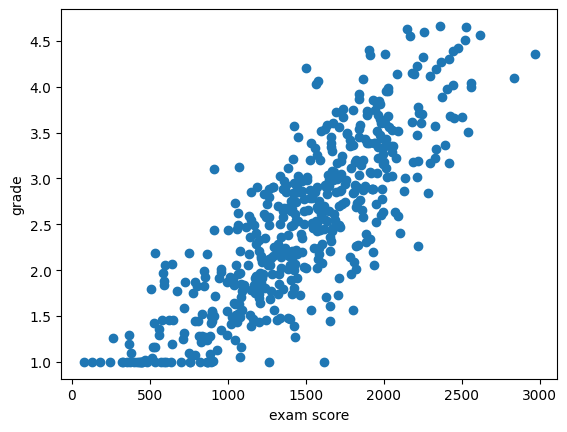

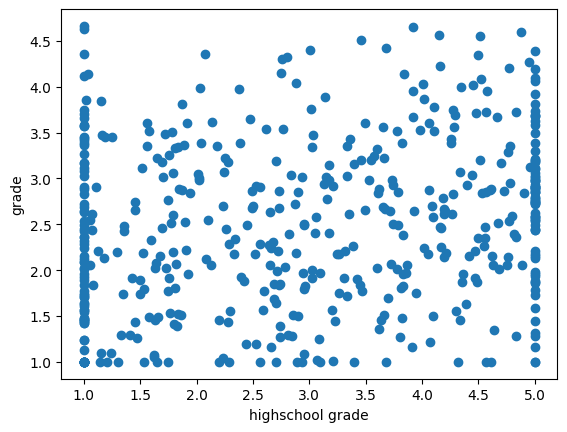

In [25]:
plt.scatter(exam_score, grades_y)
plt.xlabel("exam score")
plt.ylabel("grade")
plt.show()

plt.scatter(grade_in_highschool, grades_y)
plt.xlabel("highschool grade")
plt.ylabel("grade")
plt.show()



### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

[0.00141497 0.09477276]


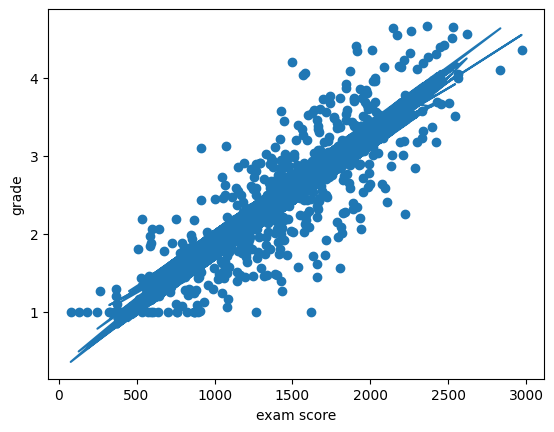

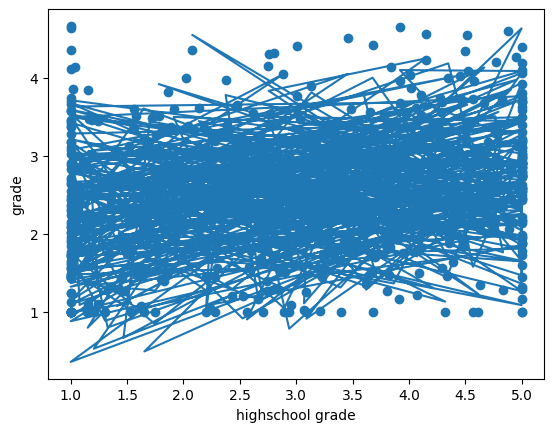

In [26]:
clf = Ridge(0.01)
clf.fit(grades_X, grades_y)

print(clf.coef_)

plt.scatter(exam_score, grades_y)
plt.plot(exam_score, clf.predict(grades_X))
plt.xlabel("exam score")
plt.ylabel("grade")
plt.show()

plt.scatter(grade_in_highschool, grades_y)
plt.plot(grade_in_highschool, clf.predict(grades_X))
plt.xlabel("highschool grade")
plt.ylabel("grade")
plt.show()


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(grade_in_highschool.reshape(-1, 1))
grade_in_highschool_fixed = scaler.transform(grade_in_highschool.reshape(-1, 1))
scaler.fit(exam_score.reshape(-1, 1))
exam_score_fixed = scaler.transform(exam_score.reshape(-1, 1))


grades_X_fixed = np.array([exam_score_fixed,grade_in_highschool_fixed]).T[0]


scaler.fit(grades_y.reshape(-1, 1))
grades_y_fixed = scaler.transform(grades_y.reshape(-1, 1))

clf = Ridge(0.01)
clf.fit(grades_X_fixed, grades_y_fixed)
print(clf.coef_)



[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [28]:
grades_X_fixed_colinear = np.hstack((grades_X_fixed, np.tile(grades_X_fixed[:, [-1]], 1)))
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [29]:
clf = Ridge(0.01)
clf.fit(grades_X_fixed_colinear, grades_y_fixed)
print(clf.coef_)

[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [30]:
l = 0.01
print("λ =", l)

coef1s = []
coef2s = []
coef3s = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
    clf = Ridge(l)
    clf.fit(X_train, y_train)

    coef1s += [clf.coef_[0][0]]
    coef2s += [clf.coef_[0][1]]
    coef3s += [clf.coef_[0][2]]

    print(clf.coef_)

print("stdev(w1) =", np.std(coef1s))
print("stdev(w2) =", np.std(coef2s))
print("stdev(w3) =", np.std(coef3s))

print()

l = 1000
print("λ =", l)
coef1s = []
coef2s = []
coef3s = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
    clf = Ridge(l)
    clf.fit(X_train, y_train)

    coef1s += [clf.coef_[0][0]]
    coef2s += [clf.coef_[0][1]]
    coef3s += [clf.coef_[0][2]]

    print(clf.coef_)

print("stdev(w1) =", np.std(coef1s))
print("stdev(w2) =", np.std(coef2s))
print("stdev(w3) =", np.std(coef3s))


λ = 0.01
[[0.79385128 0.06504303 0.06504303]]
[[0.80739011 0.0761075  0.0761075 ]]
[[0.814158   0.07673386 0.07673386]]
[[0.83265053 0.07483515 0.07483515]]
[[0.79735626 0.08013669 0.08013669]]
[[0.81845427 0.04525193 0.04525193]]
[[0.80086373 0.0614553  0.0614553 ]]
[[0.81216485 0.06648337 0.06648337]]
[[0.81501911 0.04444567 0.04444567]]
[[0.81925961 0.07443972 0.07443972]]
stdev(w1) = 0.011026717248037256
stdev(w2) = 0.012169449475302642
stdev(w3) = 0.012169449475461518

λ = 1000
[[0.16404384 0.02835895 0.02835895]]
[[0.16558664 0.03291219 0.03291219]]
[[0.16343683 0.02978618 0.02978618]]
[[0.16095001 0.02672001 0.02672001]]
[[0.16355219 0.01854873 0.01854873]]
[[0.15124127 0.0341431  0.0341431 ]]
[[0.16897681 0.02581807 0.02581807]]
[[0.17430696 0.02425615 0.02425615]]
[[0.15269851 0.03400781 0.03400781]]
[[0.15645251 0.03173866 0.03173866]]
stdev(w1) = 0.006750128762009658
stdev(w2) = 0.004701529115310349
stdev(w3) = 0.00470152911531035


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.